# How to Solve Linear Regression Using Linear Algebra
Linear regression is a method for modeling the relationship between one or more independent variables and a dependent variable.

It is a staple of statistics and is often considered a good introductory machine learning method. It is also a method that can be reformulated using matrix notation and solved using matrix operations.

In this tutorial, you will discover the matrix formulation of linear regression and how to solve it using direct and matrix factorization methods.

After completing this tutorial, you will know:

* Linear regression and the matrix reformulation with the normal equations.
* How to solve linear regression using a QR matrix decomposition.
* How to solve linear regression using SVD and the pseudoinverse.

Let’s get started.

## Tutorial Overview
This tutorial is divided into 6 parts; they are:

1. Linear Regression
2. Matrix Formulation of Linear Regression
3. Linear Regression Dataset
4. Solve Directly
5. Solve via QR Decomposition
6. Solve via Singular-Value Decomposition

## Linear Regression
Linear regression is a method for modeling the relationship between two scalar values: the input variable x and the output variable y.

The model assumes that y is a linear function or a weighted sum of the input variable.

In [ ]:
y = f(x)

Or, stated with the coefficients.

In [ ]:
y = b0 + b1 . x1

The model can also be used to model an output variable given multiple input variables called multivariate linear regression (below, brackets were added for readability).

In [ ]:
y = b0 + (b1 . x1) + (b2 . x2) + ...

The objective of creating a linear regression model is to find the values for the coefficient values (b) that minimize the error in the prediction of the output variable y.

Matrix Formulation of Linear Regression

Linear regression can be stated using Matrix notation; for example:

In [ ]:
y = X . b

Or, without the dot notation.

In [ ]:
y = Xb

Where X is the input data and each column is a data feature, b is a vector of coefficients and y is a vector of output variables for each row in X.

In [ ]:
     x11, x12, x13
X = (x21, x22, x23)
     x31, x32, x33
     x41, x42, x43
 
     b1
b = (b2)
     b3
 
     y1
y = (y2)
     y3
     y4

Reformulated, the problem becomes a system of linear equations where the b vector values are unknown. This type of system is referred to as overdetermined because there are more equations than there are unknowns, i.e. each coefficient is used on each row of data.

It is a challenging problem to solve analytically because there are multiple inconsistent solutions, e.g. multiple possible values for the coefficients. Further, all solutions will have some error because there is no line that will pass nearly through all points, therefore the approach to solving the equations must be able to handle that.

The way this is typically achieved is by finding a solution where the values for b in the model minimize the squared error. This is called linear least squares.

In [ ]:
||X . b - y||^2 = sum i=1 to m ( sum j=1 to n Xij . bj - yi)^2

This formulation has a unique solution as long as the input columns are independent (e.g. uncorrelated).

In matrix notation, this problem is formulated using the so-named normal equation:

In [ ]:
X^T . X . b = X^T . y

This can be re-arranged in order to specify the solution for b as:

In [ ]:
b = (X^T . X)^-1 . X^T . y

This can be solved directly, although given the presence of the matrix inverse can be numerically challenging or unstable.

## Linear Regression Dataset
In order to explore the matrix formulation of linear regression, let’s first define a dataset as a context.

We will use a simple 2D dataset where the data is easy to visualize as a scatter plot and models are easy to visualize as a line that attempts to fit the data points.

The example below defines a 5×2 matrix dataset, splits it into X and y components, and plots the dataset as a scatter plot.

[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]


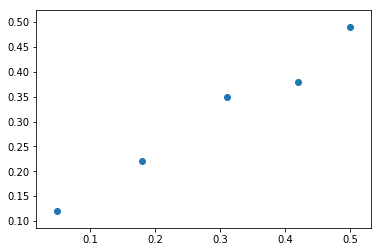

In [1]:
from numpy import array
from matplotlib import pyplot
data = array([
	[0.05, 0.12],
	[0.18, 0.22],
	[0.31, 0.35],
	[0.42, 0.38],
	[0.5, 0.49],
	])
print(data)
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# plot dataset
pyplot.scatter(X, y)
pyplot.show()

Running the example first prints the defined dataset.

A scatter plot of the dataset is then created showing that a straight line cannot fit this data exactly.

## Solve Directly
The first approach is to attempt to solve the regression problem directly.

That is, given X, what are the set of coefficients b that when multiplied by X will give y. As we saw in a previous section, the normal equations define how to calculate b directly.

In [ ]:
b = (X^T . X)^-1 . X^T . y

This can be calculated directly in NumPy using the inv() function for calculating the matrix inverse.

In [ ]:
b = inv(X.T.dot(X)).dot(X.T).dot(y)

Once the coefficients are calculated, we can use them to predict outcomes given X.

In [ ]:
yhat = X.dot(b)

Putting this together with the dataset defined in the previous section, the complete example is listed below.

[1.00233226]


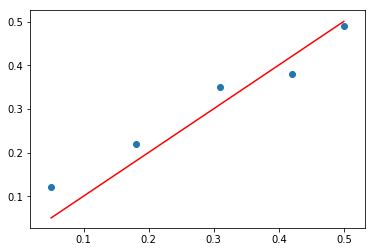

In [2]:
# solve directly
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot
data = array([
	[0.05, 0.12],
	[0.18, 0.22],
	[0.31, 0.35],
	[0.42, 0.38],
	[0.5, 0.49],
	])
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# linear least squares
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

Running the example performs the calculation and prints the coefficient vector b.

A scatter plot of the dataset is then created with a line plot for the model, showing a reasonable fit to the data.

A problem with this approach is the matrix inverse that is both computationally expensive and numerically unstable. An alternative approach is to use a matrix decomposition to avoid this operation. We will look at two examples in the following sections.

## Solve via QR Decomposition
The QR decomposition is an approach of breaking a matrix down into its constituent elements.

In [ ]:
A = Q . R

Where A is the matrix that we wish to decompose, Q a matrix with the size m x m, and R is an upper triangle matrix with the size m x n.

The QR decomposition is a popular approach for solving the linear least squares equation.

Stepping over all of the derivation, the coefficients can be found using the Q and R elements as follows:

In [ ]:
b = R^-1 . Q.T . y

The approach still involves a matrix inversion, but in this case only on the simpler R matrix.

The QR decomposition can be found using the qr() function in NumPy. The calculation of the coefficients in NumPy looks as follows:

In [ ]:
# QR decomposition
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)

Tying this together with the dataset, the complete example is listed below.

[1.00233226]


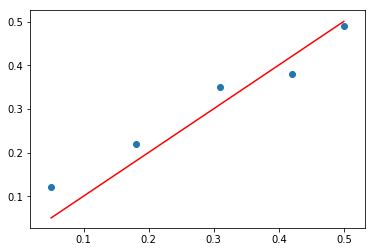

In [3]:
# least squares via QR decomposition
from numpy import array
from numpy.linalg import inv
from numpy.linalg import qr
from matplotlib import pyplot
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49],
])
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# QR decomposition
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

Running the example first prints the coefficient solution and plots the data with the model.

The QR decomposition approach is more computationally efficient and more numerically stable than calculating the normal equation directly, but does not work for all data matrices.

## Solve via Singular-Value Decomposition
The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method like the QR decomposition.

In [ ]:
X = U . Sigma . V^*

Where A is the real n x m matrix that we wish to decompose, U is a m x m matrix, Sigma (often represented by the uppercase Greek letter Sigma) is an m x n diagonal matrix, and V^* is the conjugate transpose of an n x n matrix where * is a superscript.

Unlike the QR decomposition, all matrices have an SVD decomposition. As a basis for solving the system of linear equations for linear regression, SVD is more stable and the preferred approach.

Once decomposed, the coefficients can be found by calculating the pseudoinverse of the input matrix X and multiplying that by the output vector y.

In [ ]:
b = X^+ . y

Where the pseudoinverse is calculated as following:

In [ ]:
X^+ = U . D^+ . V^T

Where X^+ is the pseudoinverse of X and the + is a superscript, D^+ is the pseudoinverse of the diagonal matrix Sigma and V^T is the transpose of V^*.

We can get U and V from the SVD operation. D^+ can be calculated by creating a diagonal matrix from Sigma and calculating the reciprocal of each non-zero element in Sigma.

In [ ]:
         s11,   0,   0
Sigma = (  0, s22,   0)
           0,   0, s33
 
     1/s11,     0,     0
D = (    0, 1/s22,     0)
         0,     0, 1/s33

We can calculate the SVD, then the pseudoinverse manually. Instead, NumPy provides the function pinv() that we can use directly.

The complete example is listed below.

[1.00233226]


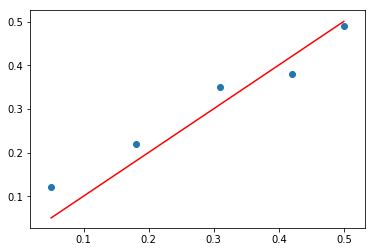

In [4]:
# least squares via SVD with pseudoinverse
from numpy import array
from numpy.linalg import pinv
from matplotlib import pyplot
data = array([
	[0.05, 0.12],
	[0.18, 0.22],
	[0.31, 0.35],
	[0.42, 0.38],
	[0.5, 0.49],
	])
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# calculate coefficients
b = pinv(X).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

Running the example prints the coefficient and plots the data with a red line showing the predictions from the model.

In fact, NumPy provides a function to replace these two steps in the lstsq() function that you can use directly.

## Summary
In this tutorial, you discovered the matrix formulation of linear regression and how to solve it using direct and matrix factorization methods.

Specifically, you learned:

* Linear regression and the matrix reformulation with the normal equations.
* How to solve linear regression using a QR matrix decomposition.
* How to solve linear regression using SVD and the pseudoinverse.